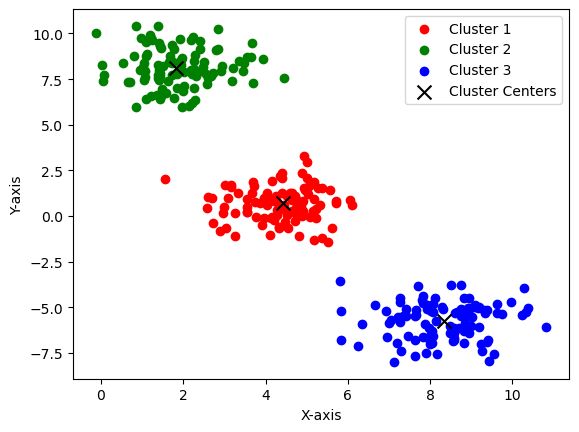

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

# Generate synthetic data with three clusters
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0)

# Estimate bandwidth for Mean Shift
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=len(X))

# Perform Mean Shift clustering
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X)

# Get cluster labels and cluster centers
labels = ms.labels_
cluster_centers = ms.cluster_centers_

# Number of clusters
n_clusters = len(np.unique(labels))

# Plot the data points and cluster centers
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i in range(n_clusters):
    cluster_points = X[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i], label=f'Cluster {i+1}')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='k', marker='x', s=100, label='Cluster Centers')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [23]:
import torch
from torch import exp, sqrt
import math

import numpy as np
import matplotlib.pyplot as plt

In [24]:
n_clusters = 6
n_samples = 1000

centroids = np.random.uniform(-35, 35, (n_clusters, 2))
slices = [np.random.multivariate_normal(centroids[i], np.diag([5., 5.]), n_samples)
          for i in range(n_clusters)]
data = np.concatenate(slices).astype(np.float32)

In [25]:
def distance(x, X):
    # return np.linalg.norm(x - X, axis=1)
    return sqrt(((x - X)**2).sum(1))

In [26]:
def gaussian(dist, bandwidth):
    return exp(-0.5 * ((dist / bandwidth))**2) / (bandwidth * math.sqrt(2 * math.pi))

In [27]:
def meanshift_step(X, bandwidth=2.5):
    for i, x in enumerate(X):
        dist = distance(x, X)
        weight = gaussian(dist, bandwidth)
        X[i] = (weight[:, None] * X).sum(0) / weight.sum()
    return X

In [28]:
def meanshift_torch(X):
    X = torch.from_numpy(np.copy(X)).cuda()
    for it in range(5):
        X = meanshift_step(X)
    return X

In [29]:
def plot_data(centroids, data, n_samples):
    colour = plt.cm.rainbow(np.linspace(0,1,len(centroids)))

    fig, ax = plt.subplots(figsize=(4, 4))
    for i, centroid in enumerate(centroids):
        samples = data[i * n_samples : (i + 1) * n_samples]
        ax.scatter(samples[:, 0], samples[:, 1], c=colour[i], s=1)
        ax.plot(centroid[0], centroid[1], markersize=10, marker="x", color='k', mew=5)
        ax.plot(centroid[0], centroid[1], markersize=5, marker="x", color='m', mew=2)
    plt.axis('equal')

AssertionError: Torch not compiled with CUDA enabled

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21460\1502422639.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(samples[:, 0], samples[:, 1], c=colour[i], s=1)


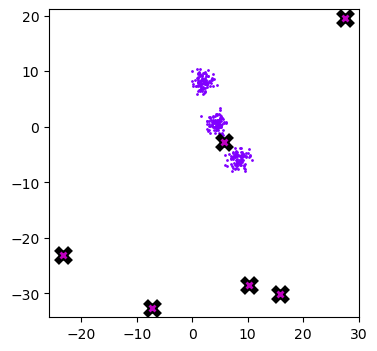

In [30]:
%time X = meanshift_torch(data).numpy()
plot_data(centroids+2, X, n_samples)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21460\1502422639.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(samples[:, 0], samples[:, 1], c=colour[i], s=1)


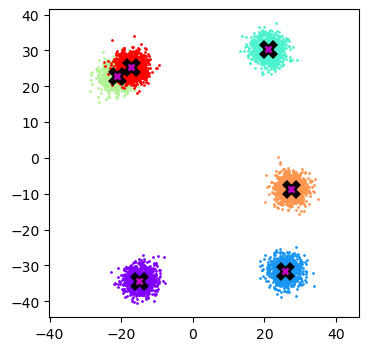

In [ ]:
plot_data(centroids, data, n_samples)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21460\1502422639.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(samples[:, 0], samples[:, 1], c=colour[i], s=1)


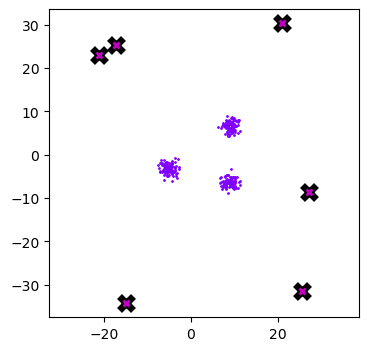

In [ ]:
plot_data(centroids, X, n_samples)